In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split
nd1=np.load('mnist_20211236_total.npz')
nd2=np.load('mnist_20201572_1.npz')
nd3=np.load('mnist_20171372.npz')
nd4=np.load('mnist_20170565.npz')
nd6=np.load('H_MNIST_train.npz')
print(nd1['img'].shape, nd1['img'].dtype, nd1['label'].shape, nd1['label'].dtype)
print(nd2['img'].shape, nd2['img'].dtype, nd2['label'].shape, nd2['label'].dtype)
print(nd3['img'].shape, nd3['img'].dtype, nd3['label'].shape, nd3['label'].dtype)
print(nd4['img'].shape, nd4['img'].dtype, nd4['label'].shape, nd4['label'].dtype)
print(nd6['img'].shape, nd6['img'].dtype, nd6['label'].shape, nd6['label'].dtype)

X=np.concatenate((nd1['img'], nd2['img'],nd3['img'],nd4['img'],nd6['img']), axis=0)
y=np.concatenate((nd1['label'], nd2['label'],nd3['label'],nd4['label'],nd6['label']), axis=0)
np.savez_compressed('mnist_total.npz', X=X, y=y)
nd5=np.load('mnist_total.npz')
nd5
X.shape
X=X.reshape(30720,784)
#X_new=X[23040:30720]
#y_new=y[23040:30720]
#X_new.shape
#y_new.shape
type(X)

(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int64
(1000, 28, 28) float64 (1000,) int32
(1000, 28, 28) float64 (1000,) int32
(26720, 28, 28) float64 (26720,) int64


numpy.ndarray

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier # Neural network
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

100


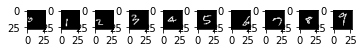

110


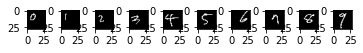

120


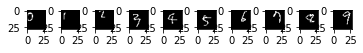

130


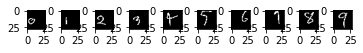

140


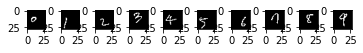

150


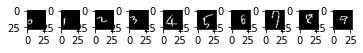

160


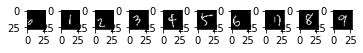

170


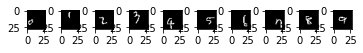

180


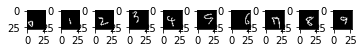

190


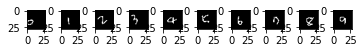

200


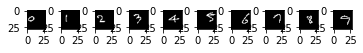

210


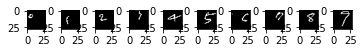

220


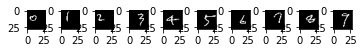

230


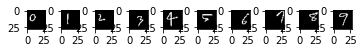

240


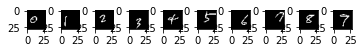

250


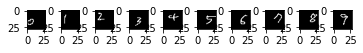

260


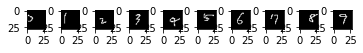

270


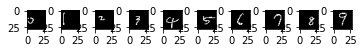

280


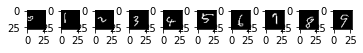

290


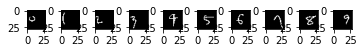

300


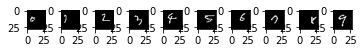

310


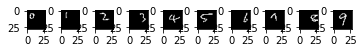

320


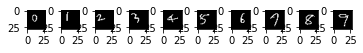

330


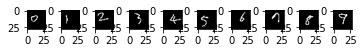

340


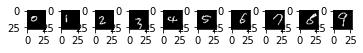

350


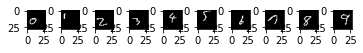

360


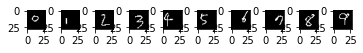

370


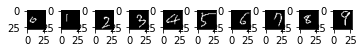

380


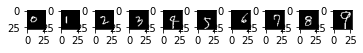

390


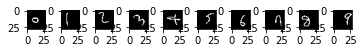

400


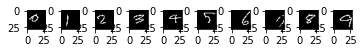

410


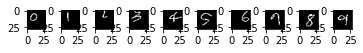

420


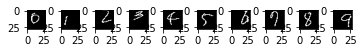

430


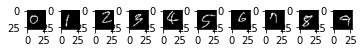

440


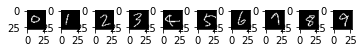

450


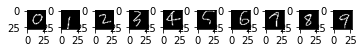

460


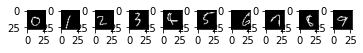

470


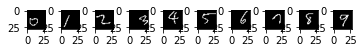

480


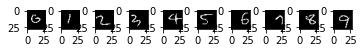

490


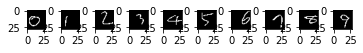

500


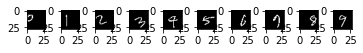

510


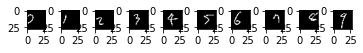

520


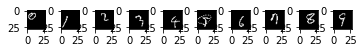

530


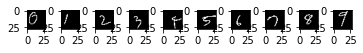

540


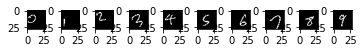

550


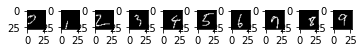

560


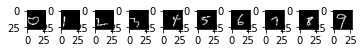

570


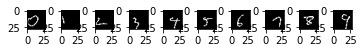

580


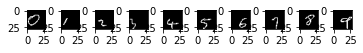

590


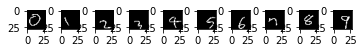

600


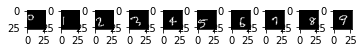

610


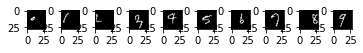

620


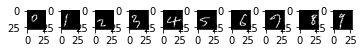

630


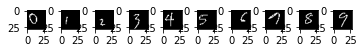

640


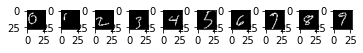

650


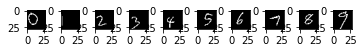

660


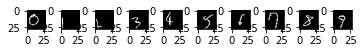

670


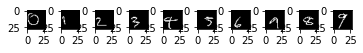

680


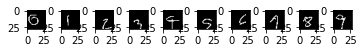

690


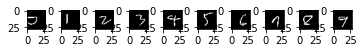

700


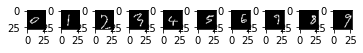

710


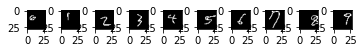

720


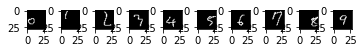

730


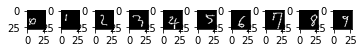

740


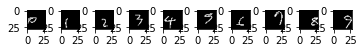

750


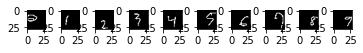

760


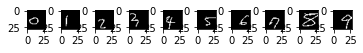

770


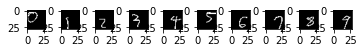

780


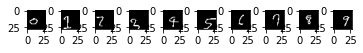

790


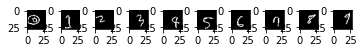

800


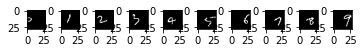

810


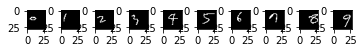

820


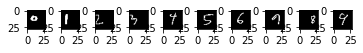

830


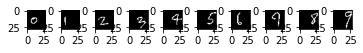

840


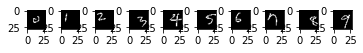

850


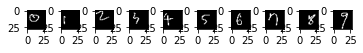

860


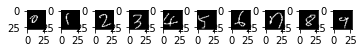

870


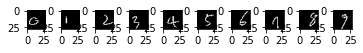

880


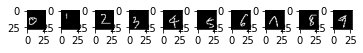

890


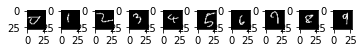

900


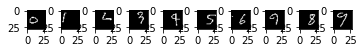

910


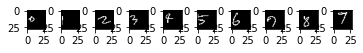

920


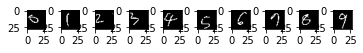

930


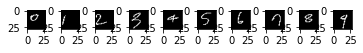

940


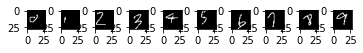

950


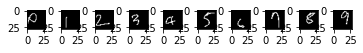

960


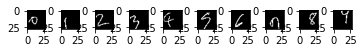

970


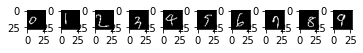

980


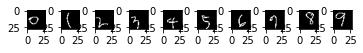

990


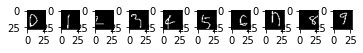

In [14]:
#숫자 한개 단위로 확인해서 읽을 수 없는 데이터 거르기
num_c=10
num_r=10
n_image=10
X_new=X.reshape(30720,28,28)
for k in range(1,10):
  for i in range(num_r):
      print(((i-1)*num_c+10)+100*(k))
      for j in range(num_c):
              
          plt.subplot(10, 10, j+1)
          

          plt.imshow(X_new[(i*num_c+j)+100*(k)],cmap='gray')#, interpolation='nearest')

      plt.show()

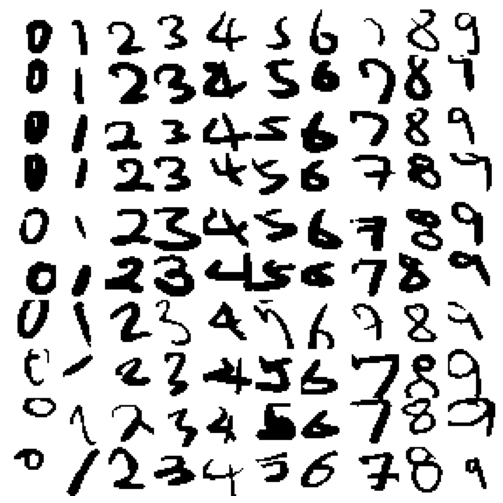

In [5]:
#plot_digits 함수를 이용하여
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
import matplotlib as mpl

plt.figure(figsize=(9,9))
example_images = X[30620:30720]
plot_digits(example_images, images_per_row=10)

In [6]:
#남길 데이터만 리스트로 저장하기
a=X[23110:23120]
b=X[23230:23340]
c=X[23420:23450]
d=X[23520:23720]
e=X[23770:23780]
f=X[23900:23920]
g=X[23970:24110]
h=X[24140:24270]
i=X[24780:28410]
j=X[28460:30720]
a_0=X[:2000]
b_0=X[2100:2070]
c_0=X[2210:2220]
d_0=X[2230:2280]
e_0=X[2410:2800]
f_0=X[2900:6980]
g_0=X[6900:7300]
h_0=X[7400:7500]
i_0=X[7600:7680]
a_1=X[15361:18700]
b_1=X[19120:19290]
c_1=X[19300:19310]
d_1=X[19320:21760]
e_1=X[21780:21790]
f_1=X[21800:21810]
g_1=X[21820:21830]
h_1=X[21840:21850]
i_1=X[21860:21880]
j_1= X[21890:23050]
a_2=X[7680:8200]
b_2=X[8220:8340]
c_2=X[8360:9310]
d_2=X[9520:11920]
e_2=X[11950:12120]
f_2=X[12220:15361]

X_new=np.concatenate((a,b,c,d,e,f,h,g,h,i,j,a_0, b_0,c_0,d_0,e_0,f_0,g_0,h_0,i_0,a_1,b_1,c_1,d_1,e_1,f_1,g_1,h_1,i_1
                     ,j_1,a_2,b_2,c_2,d_2,e_2,f_2))
X_new=X_new.reshape(28260,784)
X_new.shape


(28260, 784)

In [7]:
a_3=y[23110:23120]
b_3=y[23230:23340]
c_3=y[23420:23450]
d_3=y[23520:23720]
e_3=y[23770:23780]
f_3=y[23900:23920]
g_3=y[23970:24110]
h_3=y[24140:24270]
i_3=y[24780:28410]
j_3=y[28460:30720]
a_4=y[:2000]
b_4=y[2100:2070]
c_4=y[2210:2220]
d_4=y[2230:2280]
e_4=y[2410:2800]
f_4=y[2900:6980]
g_4=y[6900:7300]
h_4=y[7400:7500]
i_4=y[7600:7680]
a_5=y[15361:18700]
b_5=y[19120:19290]
c_5=y[19300:19310]
d_5=y[19320:21760]
e_5=y[21780:21790]
f_5=y[21800:21810]
g_5=y[21820:21830]
h_5=y[21840:21850]
i_5=y[21860:21880]
j_5=y[21890:23050]
a_6=y[7680:8200]
b_6=y[8220:8340]
c_6=y[8360:9310]
d_6=y[9520:11920]
e_6=y[11950:12120]
f_6=y[12220:15361]
y_new=np.concatenate((a_3,b_3,c_3,d_3,e_3,f_3,h_3,g_3,h_3,i_3,j_3,a_4, b_4,c_4,d_4,e_4,f_4,g_4,h_4,i_4,a_5,b_5,c_5,d_5,e_5,f_5,g_5,h_5,i_5
                     ,j_5,a_6,b_6,c_6,d_6,e_6,f_6))
y_new.shape

(28260,)

In [8]:
#data cleaning 전 train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = False, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(18432, 784) (6144, 784) (6144, 784)
(18432,) (6144,) (6144,)


In [9]:
from sklearn.model_selection import train_test_split
X_new_train0, X_new_test, y_new_train0, y_new_test = train_test_split(X_new, y_new,
    test_size=0.2, shuffle = False, random_state = 8)

# Use the same function above for the validation set
X_new_train, X_new_val, y_new_train, y_new_val = train_test_split(X_new_train0, y_new_train0, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2
print(X_new_train.shape, X_new_val.shape, X_new_test.shape)
print(y_new_train.shape, y_new_val.shape, y_new_test.shape)

(16956, 784) (5652, 784) (5652, 784)
(16956,) (5652,) (5652,)


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X_mnist, y_mnist = mnist["data"], mnist["target"] # X, y: pandas DataFrame
X.shape
y.shape

In [ ]:
y_mnist=y_mnist.astype(np.uint8)

In [ ]:
X_final=np.concatenate((X_new, X_mnist), axis=0)
y_final=np.concatenate((y_new , y_mnist), axis=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
knn_clf=KNeighborsClassifier(n_jobs=-1,n_neighbors=3)
knn_clf.fit(X_train,y_train)
print(knn_clf.score(X_train, y_train))
print(knn_clf.score(X_test, y_test))

In [ ]:
knn_clf=KNeighborsClassifier(n_jobs=-1,n_neighbors=3)
knn_clf.fit(X_new_train,y_new_train)
print(knn_clf.score(X_new_train, y_new_train))
print(knn_clf.score(X_new_test, y_new_test))

In [1]:
from sklearn.model_selection import train_test_split
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_final_train, X_final_val, y_final_train, y_final_val = train_test_split(X_final_train, y_final_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

knn_clf=KNeighborsClassifier(n_jobs=-1,n_neighbors=3)
knn_clf.fit(X_final_train,y_final_train)
print(knn_clf.score(X_final_train, y_final_train))
print(knn_clf.score(X_final_test, y_final_test))

NameError: name 'X_final' is not defined

In [24]:
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(random_state=42)
softmax_reg.fit(X_final_train, y_final_train)
print(softmax_reg.score(X_final_train, y_final_train))
print(softmax_reg.score(X_final_test, y_final_test))

NameError: name 'X_final_train' is not defined

In [375]:
#데이터 클리닝 전 dataset
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(random_state=42)
softmax_reg.fit(X_train, y_train)
print(softmax_reg.score(X_train, y_train))
print(softmax_reg.score(X_test, y_test))

0.4590928819444444
0.3727213541666667


/Users/yoon-jaelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [359]:
#데이터 클리닝 후 dataset
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(random_state=42)
softmax_reg.fit(X_new_train, y_new_train)
print(softmax_reg.score(X_new_train, y_new_train))
print(softmax_reg.score(X_new_test, y_new_test))

0.4713965557914602
0.39012738853503187


/Users/yoon-jaelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [374]:
#데이터 클리닝 전 dataset
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
print(svm_clf.score(X_train, y_train))
print(svm_clf.score(X_test, y_test))

0.8308376736111112
0.701171875


In [372]:
#데이터 클리닝 후 dataset
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_new_train, y_new_train)
print(svm_clf.score(X_new_train, y_new_train))
print(svm_clf.score(X_new_test, y_new_test))

0.8516159471573485
0.7080679405520169


In [382]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)
rnf_clf.fit(X_train, y_train)
cross_val_score(rnf_clf, X_train, y_train, cv = 10, scoring = "accuracy")
print(rnf_clf.score(X_train,y_train))
print(rnf_clf.score(X_test,y_test))

0.9976671006944444
0.69189453125
